# Term Deposit Marketing Case

Attributes:

age : age of customer (numeric)

job : type of job (categorical)

marital : marital status (categorical)

education (categorical)

default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Output (desired target):

y - has the client subscribed to a term deposit? (binary)

In [258]:
import pandas as pd

In [259]:
df = pd.read_csv("term-deposit-marketing-2020.csv")

In [260]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


We have 13 column dataset. We will try to fit a classification model to predict column y

Before we test different machine learning algorithms, we will make the data suitable for algorithms

Firstly, we will clean the dataset. ( Null values, incorrect values or outlier points etc. ). After this, we will convert non-numeric columns to numeric. At this point, we do not need extra processing in binary columns, but we will need extra operations in other columns that have more than two types of attributes. (LabelEncoder, OneHotEncoder)

After our data is suitable, we will create our test and train datasets with the 5-fold cross validation method, and we will fit our classification models over the new data sets.

In [262]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,40000.0,40.544600,9.641776,19.0,33.0,39.0,48.0,95.0
balance,40000.0,1274.277550,2903.769716,-8019.0,54.0,407.0,1319.0,102127.0
day,40000.0,16.017225,8.278127,1.0,8.0,17.0,21.0,31.0
duration,40000.0,254.824300,259.366498,0.0,100.0,175.0,313.0,4918.0
campaign,40000.0,2.882175,3.239051,1.0,1.0,2.0,3.0,63.0


In [263]:
df.isnull().values.any()

False

In [264]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [265]:
# we have no null value

In [266]:
kat_df = df.select_dtypes( include=["object"] )

In [267]:
kat_df.head()

,job,marital,education,default,housing,loan,contact,month,y
0,management,married,tertiary,no,yes,no,unknown,may,no
1,technician,single,secondary,no,yes,no,unknown,may,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,no
4,unknown,single,unknown,no,no,no,unknown,may,no


In [268]:
kat_df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [269]:
# Maybe, we need to careful about unknown. We have note that

In [270]:
kat_df["job"].value_counts()

blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: job, dtype: int64

In [271]:
kat_df["month"].value_counts()

may    13532
jul     6380
aug     5215
jun     4734
nov     3598
apr     2718
feb     2296
jan     1176
mar      258
oct       80
dec       13
Name: month, dtype: int64

# Data Visualization

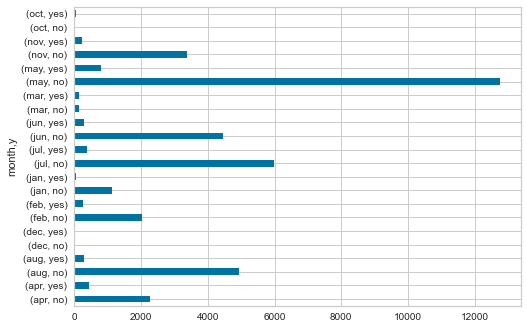

In [272]:
df.groupby(["month","y"])["month"].count().plot.barh()

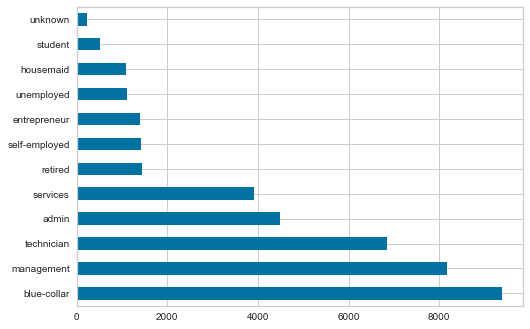

In [273]:
kat_df["job"].value_counts().plot.barh();

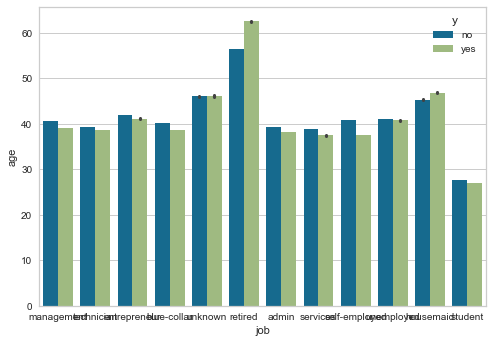

In [274]:
import seaborn as sns
sns.barplot(x="job", y="age", hue="y", data=df, ci=5 );

In [275]:
# There are no clear difference between jobs and age

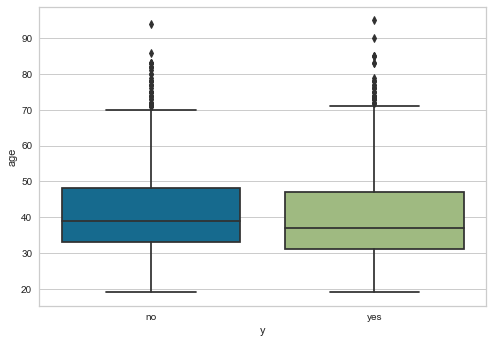

In [276]:
sns.boxplot( x=df.y, y=df.age, orient="v");

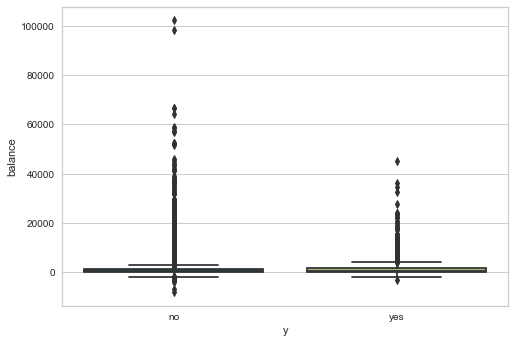

In [277]:
sns.boxplot( x=df.y, y=df.balance );

we are searching for significant difference

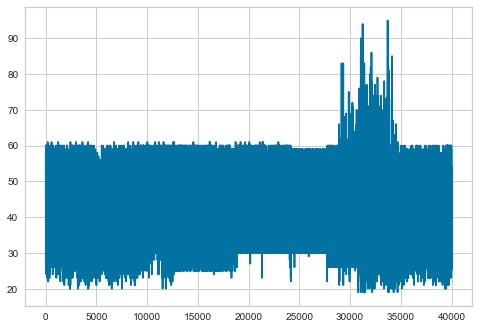

In [278]:
df["age"].plot()

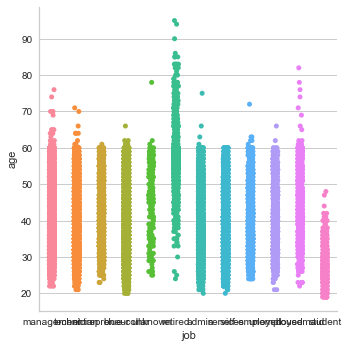

In [279]:
sns.catplot(x="job", y="age", data=df, legend_out=True, margin_titles=True, n_boot=10, orient="v" );

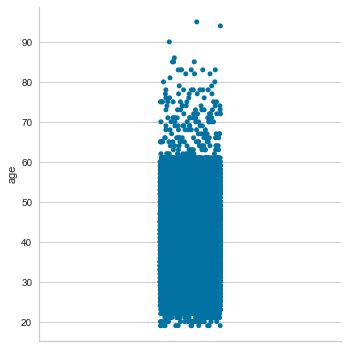

In [280]:
sns.catplot( y="age", data=df )

In [281]:
# Actualy, we have seen some outlier points in balance and age but we are not sure yet about they are problem for fitting 
# the model. We will use scaling methods before fitting the models. Maybe this can helpful for us. Therefore, we do not delete
# this rows for now

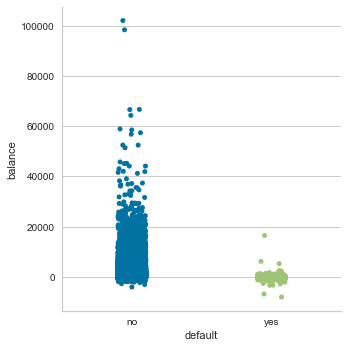

In [282]:
sns.catplot( x="default", y="balance", data=df );
# there can be high information gain here 

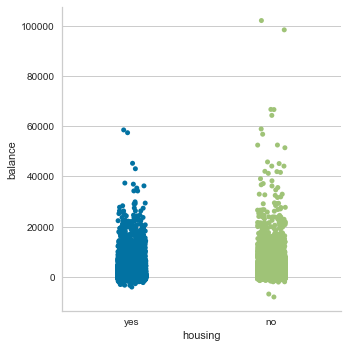

In [283]:
sns.catplot( x="housing", y="balance", data=df );

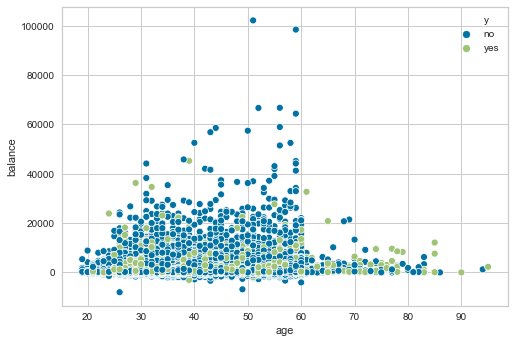

In [284]:
sns.scatterplot(x="age", y="balance", hue="y", data=df);

# Label Encoder - OneHot Encoder

In [285]:
kat_df = df.select_dtypes( include=["object"] )

In [286]:
kat_df.head()

,job,marital,education,default,housing,loan,contact,month,y
0,management,married,tertiary,no,yes,no,unknown,may,no
1,technician,single,secondary,no,yes,no,unknown,may,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,no
4,unknown,single,unknown,no,no,no,unknown,may,no


In [287]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder() #kategorik veriyi rakam haline getiriyor
ohe = OneHotEncoder() #rakam haline gelen veriyi distinc sayı kadar kolona dönüştürüyor

As an example, we will look at the numerical process of 2 columns; default and job.
Default is binary but job has more than 2 different values. 
Label Encoder will be enough for default but we need to use OneHot Encoder to make "job" numeric.

The reason of this, we need to lose hierarchy between the job. For example, Label Encoder assign 1 to technician and 2 to blue-collar. But this two job have no numerical relation like this.

##### Summary of Label&OneHot Encoder

In [288]:
df_def = pd.DataFrame( data=le.fit_transform( kat_df["default"] ), columns=["default"] )

In [289]:
df_def["default"].value_counts()

0    39191
1      809
Name: default, dtype: int64

In [290]:
kat_df_job = pd.DataFrame( kat_df, columns=["job"] )

In [291]:
kat_df_job["job_le"] = le.fit_transform( kat_df["job"] )

In [292]:
kat_df_job.head()

,job,job_le
0,management,4
1,technician,9
2,entrepreneur,2
3,blue-collar,1
4,unknown,11


In [293]:
ohe.fit_transform(kat_df_job.iloc[:,0:1].values).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [294]:
job_arr = ohe.fit_transform(kat_df_job.iloc[:,1:2].values).toarray()

In [295]:
df_job = pd.DataFrame(data = job_arr )

In [296]:
df_job.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [297]:
for i in df_job.columns:
    df_job.rename(columns={ df_job.columns[i]: "Job is " + str( kat_df_job["job"][kat_df_job["job_le"] == i].unique()[0] ) }, inplace = True)


In [298]:
df_job.head()

,Job is admin,Job is blue-collar,Job is entrepreneur,Job is housemaid,Job is management,Job is retired,Job is self-employed,Job is services,Job is student,Job is technician,Job is unemployed,Job is unknown
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Now, two types of examples are ok. At the sameway, we can make numeric other columns

In [299]:
# job marital education default housing loan contact month
# OHE job marital education contact month
# LE default housing loan with

In [300]:
kat_df["marital"].value_counts()

married     24386
single      10889
divorced     4725
Name: marital, dtype: int64

In [301]:
kat_df["education"].value_counts()

secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: education, dtype: int64

In [302]:
kat_df["housing"].value_counts()

yes    24031
no     15969
Name: housing, dtype: int64

In [303]:
kat_df["loan"].value_counts()

no     33070
yes     6930
Name: loan, dtype: int64

In [304]:
kat_df["contact"].value_counts()

cellular     24914
unknown      12765
telephone     2321
Name: contact, dtype: int64

In [305]:
kat_df["month"].value_counts()

may    13532
jul     6380
aug     5215
jun     4734
nov     3598
apr     2718
feb     2296
jan     1176
mar      258
oct       80
dec       13
Name: month, dtype: int64

##### General implementation of Label&OneHot Encoders

In [306]:
kat_df1 = kat_df[ ["job","marital","education","contact","month"] ]
kat_df2 = kat_df[ ["housing","loan","default"] ]

In [307]:
kat_df1.head()

,job,marital,education,contact,month
0,management,married,tertiary,unknown,may
1,technician,single,secondary,unknown,may
2,entrepreneur,married,secondary,unknown,may
3,blue-collar,married,unknown,unknown,may
4,unknown,single,unknown,unknown,may


In [308]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ohe = OneHotEncoder(handle_unknown='ignore')

In [309]:
dfn = pd.DataFrame( data=df["y"].iloc[0:].values, columns=["y"] )

cols = kat_df1.columns

for i in range(0,len(cols)-1):
    prfx = str(cols[i]) + "_is"
    dfn1 = pd.get_dummies(kat_df1[cols[i]].iloc[0:].values, columns=[cols[i]], prefix=prfx  )
    dfn = dfn.join(dfn1)                   

dfn.head()
dfn.tail()

,y,job_is_admin,job_is_blue-collar,job_is_entrepreneur,job_is_housemaid,job_is_management,job_is_retired,job_is_self-employed,job_is_services,job_is_student,...,marital_is_divorced,marital_is_married,marital_is_single,education_is_primary,education_is_secondary,education_is_tertiary,education_is_unknown,contact_is_cellular,contact_is_telephone,contact_is_unknown
39995,no,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
39996,yes,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
39997,yes,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
39998,no,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
39999,no,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [310]:
kat_df2

,housing,loan,default
0,yes,no,no
1,yes,no,no
2,yes,yes,no
3,yes,no,no
4,no,no,no
...,...,...,...
39995,no,no,no
39996,no,no,no
39997,no,no,no
39998,no,no,no


In [311]:
cols = kat_df2.columns

for i in cols:
    dfn2 = pd.DataFrame( data=le.fit_transform( kat_df2[i] ), columns=[i] )
    dfn = dfn.join(dfn2)
    
dfn.tail()    

,y,job_is_admin,job_is_blue-collar,job_is_entrepreneur,job_is_housemaid,job_is_management,job_is_retired,job_is_self-employed,job_is_services,job_is_student,...,education_is_primary,education_is_secondary,education_is_tertiary,education_is_unknown,contact_is_cellular,contact_is_telephone,contact_is_unknown,housing,loan,default
39995,no,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
39996,yes,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
39997,yes,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
39998,no,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
39999,no,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [312]:
del dfn["y"]

In [313]:
dfn.head()

,job_is_admin,job_is_blue-collar,job_is_entrepreneur,job_is_housemaid,job_is_management,job_is_retired,job_is_self-employed,job_is_services,job_is_student,job_is_technician,...,education_is_primary,education_is_secondary,education_is_tertiary,education_is_unknown,contact_is_cellular,contact_is_telephone,contact_is_unknown,housing,loan,default
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [314]:
dfn[["age","balance","duration","campaign"]] = df[["age","balance","duration","campaign"]]

In [315]:
dfn.head()

,job_is_admin,job_is_blue-collar,job_is_entrepreneur,job_is_housemaid,job_is_management,job_is_retired,job_is_self-employed,job_is_services,job_is_student,job_is_technician,...,contact_is_cellular,contact_is_telephone,contact_is_unknown,housing,loan,default,age,balance,duration,campaign
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,58,2143,261,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,44,29,151,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,1,0,33,2,76,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,47,1506,92,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,33,1,198,1


In [316]:
# our data is ready

In [317]:
dfn.head()

,job_is_admin,job_is_blue-collar,job_is_entrepreneur,job_is_housemaid,job_is_management,job_is_retired,job_is_self-employed,job_is_services,job_is_student,job_is_technician,...,contact_is_cellular,contact_is_telephone,contact_is_unknown,housing,loan,default,age,balance,duration,campaign
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,58,2143,261,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,44,29,151,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,1,0,33,2,76,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,47,1506,92,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,33,1,198,1


In [318]:
# Now, we can use "dfn" for training data and we can try to predict df["y"]. 

# Decision Tree and Random Forest Implementation

In [319]:


from sklearn.model_selection import train_test_split

In [320]:
x = dfn.iloc[:,:].values #bağımsız değişkenler
y = df.y.iloc[:].values #bağımlı değişken
print(y)

import sklearn
#verilerin egitim ve test icin bolunmesi
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)

#verilerin olceklenmesi
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

['no' 'no' 'no' ... 'yes' 'no' 'no']


In [321]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy') #default da gini çalışır
#dtc = DecisionTreeClassifier()

dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('DTC')
print(cm)

DTC
[[11588   661]
 [  637   314]]


In [322]:
# we have approximately 90% accuracy rate with train_test_split ( seperation with 0.67-.33 ratio )

In [323]:
# Importing Libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Loading Data
X = dfn.iloc[:].values
y = df["y"].iloc[:].values

# Train/Test Split : random_state = 49
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=49)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy_score(y_test, y_pred)
print('Accuracy score for random_state = 49 : ' + str(accuracy_score(y_test, y_pred)))

Accuracy score for random_state = 49 : 0.9275


In [324]:
#As we see, a little bit better result with Random Forest

## Kfold Cross Validation Implementation

In [325]:
# Now, we will generate Random Forest algorithm with 5-fold cross validation.

In [326]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Kfold Split 
X = dfn.iloc[:].values
y = df["y"].iloc[:].values

folds = KFold(n_splits = 5, shuffle = True, random_state = 35)
scores = []

for n_fold, (train_index, valid_index) in enumerate(folds.split(X,y)):
    print('\n Fold '+ str(n_fold+1 ) + 
          ' \n\n train ids :' +  str(train_index) +
          ' \n\n validation ids :' +  str(valid_index))
    
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]
    
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    
    acc_score = accuracy_score(y_test, y_pred)
    scores.append(acc_score)
    print('\n Accuracy score for Fold ' +str(n_fold+1) + ' --> ' + str(acc_score)+'\n')

    
print(scores)
print('Avg. accuracy score :' + str(np.mean(scores)))
                  


 Fold 1 

 train ids :[    0     1     2 ... 39994 39996 39998] 

 validation ids :[    3     6    14 ... 39995 39997 39999]

 Accuracy score for Fold 1 --> 0.98675


 Fold 2 

 train ids :[    0     3     5 ... 39997 39998 39999] 

 validation ids :[    1     2     4 ... 39975 39980 39981]

 Accuracy score for Fold 2 --> 0.986125


 Fold 3 

 train ids :[    1     2     3 ... 39997 39998 39999] 

 validation ids :[    0    10    11 ... 39991 39992 39996]

 Accuracy score for Fold 3 --> 0.986125


 Fold 4 

 train ids :[    0     1     2 ... 39997 39998 39999] 

 validation ids :[    9    15    25 ... 39985 39988 39993]

 Accuracy score for Fold 4 --> 0.984


 Fold 5 

 train ids :[    0     1     2 ... 39996 39997 39999] 

 validation ids :[    5     7     8 ... 39990 39994 39998]

 Accuracy score for Fold 5 --> 0.984125

[0.98675, 0.986125, 0.986125, 0.984, 0.984125]
Avg. accuracy score :0.985425


In [327]:
## we have got very significiant solution. Avg. accuracy score is 0.9856

In [328]:
# Kfold Split with cross_val_score
from sklearn.model_selection import cross_val_score
X = dfn.iloc[:].values
y = df["y"].iloc[:].values
scores = cross_val_score(rf_model, X, y, cv=10)
scores.mean()

0.9229500000000002

In [329]:
# In 10-fold validation, we get lower accuracy rates

In [330]:
# Actually, we can fit the model with different parameters but we got very high accuracy rate.
# Therefore, we do not need to generate codes below

In [331]:
#rf_params = {"max_depth": [2,5,8,10],
#            "max_features": [2,5,8],
#            "n_estimators": [10,500,1000],
#            "min_samples_split": [2,5,10]}


## Bonus Part

We can evaluate two questions under the same roof. With the informations we have, we can assume that the general characteristics of customers receiving time deposits will be similar to those who will buy investment products.

We will examine what is effective in purchasing time deposits and look at which of these situations can be used in a general segmentation.

In our dataset, we have no information about investment product. At this point, we need to apply unsupervied learning method.
At this area, as we know there is no clear accuracy measuremets like supervised learning.

Nevertheless, we have already made a similar working.
When we look at it from a financial perspective, we can say that the Time Deposit is the most fundamental investment product. Although there are structural differences between customers who prefer investment products and customers who prefer time deposit products, we can say that the expectations of the two types of customers are generally same.

It seems reasonable to use the K-means algorithm when doing this analysis. For information on which variables to use, I hope that an analysis such as which variables were effective in the previous Random Forest algorithm will be very useful for us. 
Along with the information we have obtained here, we can also add some subjective additions based on financial background.





In [332]:
Importance = pd.DataFrame({"Importance": rf_model.feature_importances_*100},
                         index = dfn.columns)

In [333]:
Importance

,Importance
job_is_admin,0.990907
job_is_blue-collar,0.958308
job_is_entrepreneur,0.492406
job_is_housemaid,0.370046
job_is_management,1.025029
job_is_retired,0.424627
job_is_self-employed,0.593271
job_is_services,0.779481
job_is_student,0.336687
job_is_technician,1.197713


Text(0.5, 0, 'Değişken Önem Düzeyleri')

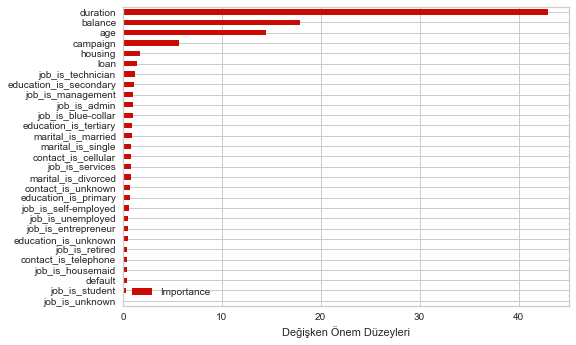

In [334]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

In [335]:
# We have seen duration, balance, age and campaing variables are very effective on time deposit preferences.
# Also, We need to look at total effect for job or educaton variables. 
# They are approximately have 8% and 5% effect in decision tree.

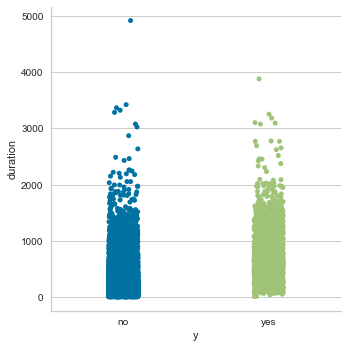

In [336]:
sns.catplot( x="y", y="duration", data=df, ci=5, n_boot=10 );

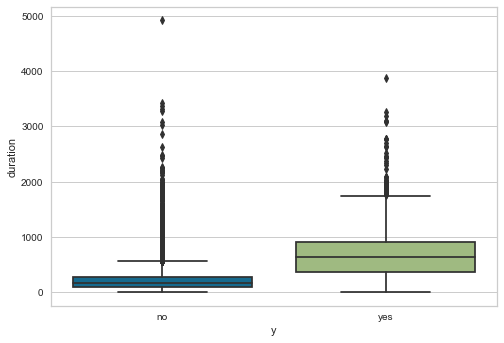

In [337]:
sns.boxplot( x=df.y, y=df.duration );

In [338]:
# We could not seen difference in catplot but we can see the diffrence in boxplot clearly. 
# It is highly possible that calls close to the customer's expiry will yield more efficient results.
# Although this column does not give us exactly this information, with a high probability we can obtain this information.
# Long time after the last call has a positive effect on the customer's acceptance of the new deposit offer. 
# We can expect the same effect in the choice of investment product. Therefore we can take it as an input for K-means

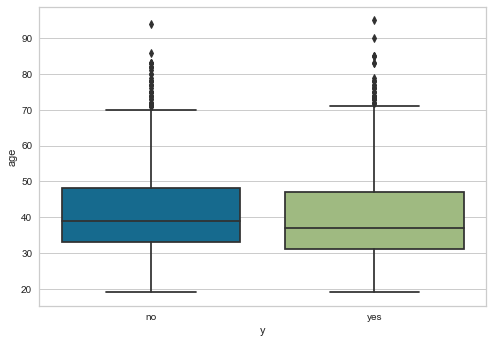

In [339]:
sns.boxplot( x=df.y, y=df.age );

In [340]:
# Although the age information shows a slight difference in term deposit preferences, it is not significant indicator.
# However, I assume that age information will be more critical in choosing investment products. 
# Due to the fact that they are more complex products, they can be preferred more by young customers.
# We can suppose that education column have similar effect with age.

In [341]:
# We analyzed the influencing variables in the Random Forest, and this situation made serious contributions to our new segmentation model.


In [342]:
# Accordingly, it would make sense to include variables balance, age, housing, job, education in the model. 
# We eliminated duration and campaing information.
# Although the duration and campaign information has a high impact on the decision tree, 
# they are not very suitable information to put the general segmentation of the customer.
# These variables are factors that can change rapidly over time and do not reflect the characteristics of the customer.

In [343]:
df_seg = df[ ["balance", "age", "housing", "job", "education"] ]

In [344]:
df_seg.head()

,balance,age,housing,job,education
0,2143,58,yes,management,tertiary
1,29,44,yes,technician,secondary
2,2,33,yes,entrepreneur,secondary
3,1506,47,yes,blue-collar,unknown
4,1,33,no,unknown,unknown


In [345]:
# balance, age variables are suiatble for k-means.
# housing column is convertible easily to one and zero
# In job and education column we can apply One Hot Encoding method but instead of this, 
# we will apply factorization method

In [346]:
df_seg["housing"] = df_seg["housing"].apply(lambda x: 1 if x == "yes" else x)
df_seg["housing"] = df_seg["housing"].apply(lambda x: 0 if x == "no"  else x)

<ipython-input-346-23d5ef17acd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seg["housing"] = df_seg["housing"].apply(lambda x: 1 if x == "yes" else x)
<ipython-input-346-23d5ef17acd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seg["housing"] = df_seg["housing"].apply(lambda x: 0 if x == "no"  else x)


In [347]:
df_seg.head()

,balance,age,housing,job,education
0,2143,58,1,management,tertiary
1,29,44,1,technician,secondary
2,2,33,1,entrepreneur,secondary
3,1506,47,1,blue-collar,unknown
4,1,33,0,unknown,unknown


In [348]:
# Before moving on to job and education variables, we will do a little trick using the deposit information from the previous data.

In [349]:
# Instead of creating new columns with OneHotEncoder, we will add time deposit preference possibilities 
# according to occupation and education groups to the df_seg table.

In [350]:
df_seg["y"] = df["y"]
df_seg["y"] = df_seg["y"].apply(lambda x: 1 if x == "yes" else x)
df_seg["y"] = df_seg["y"].apply(lambda x: 0 if x == "no" else x)

<ipython-input-350-d007a80c5f3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seg["y"] = df["y"]
<ipython-input-350-d007a80c5f3c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seg["y"] = df_seg["y"].apply(lambda x: 1 if x == "yes" else x)
<ipython-input-350-d007a80c5f3c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [351]:
df_seg.head()

,balance,age,housing,job,education,y
0,2143,58,1,management,tertiary,0
1,29,44,1,technician,secondary,0
2,2,33,1,entrepreneur,secondary,0
3,1506,47,1,blue-collar,unknown,0
4,1,33,0,unknown,unknown,0


In [352]:
job_series = df_seg.groupby(["job"]).mean().y

In [353]:
job_df = pd.DataFrame( data=job_series.values, columns=["job_new"] )
job_df["job_pre"] = job_series.index
#
df_seg = pd.merge(df_seg, job_df, how="left", left_on="job", right_on="job_pre")
df_seg

,balance,age,housing,job,education,y,job_new,job_pre
0,2143,58,1,management,tertiary,0,0.082782,management
1,29,44,1,technician,secondary,0,0.072534,technician
2,2,33,1,entrepreneur,secondary,0,0.062633,entrepreneur
3,1506,47,1,blue-collar,unknown,0,0.057018,blue-collar
4,1,33,0,unknown,unknown,0,0.072340,unknown
...,...,...,...,...,...,...,...,...
39995,395,53,0,technician,tertiary,0,0.072534,technician
39996,3340,30,0,management,tertiary,1,0.082782,management
39997,200,54,0,admin,secondary,1,0.078296,admin
39998,1047,34,0,management,tertiary,0,0.082782,management


In [354]:
df_seg

,balance,age,housing,job,education,y,job_new,job_pre
0,2143,58,1,management,tertiary,0,0.082782,management
1,29,44,1,technician,secondary,0,0.072534,technician
2,2,33,1,entrepreneur,secondary,0,0.062633,entrepreneur
3,1506,47,1,blue-collar,unknown,0,0.057018,blue-collar
4,1,33,0,unknown,unknown,0,0.072340,unknown
...,...,...,...,...,...,...,...,...
39995,395,53,0,technician,tertiary,0,0.072534,technician
39996,3340,30,0,management,tertiary,1,0.082782,management
39997,200,54,0,admin,secondary,1,0.078296,admin
39998,1047,34,0,management,tertiary,0,0.082782,management


In [355]:
df_seg.drop( ["job_pre", "job"], axis=1, inplace=True )

In [356]:
df_seg

,balance,age,housing,education,y,job_new
0,2143,58,1,tertiary,0,0.082782
1,29,44,1,secondary,0,0.072534
2,2,33,1,secondary,0,0.062633
3,1506,47,1,unknown,0,0.057018
4,1,33,0,unknown,0,0.072340
...,...,...,...,...,...,...
39995,395,53,0,tertiary,0,0.072534
39996,3340,30,0,tertiary,1,0.082782
39997,200,54,0,secondary,1,0.078296
39998,1047,34,0,tertiary,0,0.082782


In [357]:
education_series = df_seg.groupby(["education"]).mean().y
education_df = pd.DataFrame( data=education_series.values, columns=["education_new"] )
education_df["education_pre"] = education_series.index
#
df_seg = pd.merge(df_seg, education_df, how="left", left_on="education", right_on="education_pre")
df_seg

,balance,age,housing,education,y,job_new,education_new,education_pre
0,2143,58,1,tertiary,0,0.082782,0.091826,tertiary
1,29,44,1,secondary,0,0.072534,0.067546,secondary
2,2,33,1,secondary,0,0.062633,0.067546,secondary
3,1506,47,1,unknown,0,0.057018,0.062704,unknown
4,1,33,0,unknown,0,0.072340,0.062704,unknown
...,...,...,...,...,...,...,...,...
39995,395,53,0,tertiary,0,0.072534,0.091826,tertiary
39996,3340,30,0,tertiary,1,0.082782,0.091826,tertiary
39997,200,54,0,secondary,1,0.078296,0.067546,secondary
39998,1047,34,0,tertiary,0,0.082782,0.091826,tertiary


In [358]:
df_seg.drop( ["education_pre", "education"], axis=1, inplace=True )
df_seg.head()

,balance,age,housing,y,job_new,education_new
0,2143,58,1,0,0.082782,0.091826
1,29,44,1,0,0.072534,0.067546
2,2,33,1,0,0.062633,0.067546
3,1506,47,1,0,0.057018,0.062704
4,1,33,0,0,0.072340,0.062704


In [359]:
df_seg.drop( ["y"], axis=1, inplace=True )
df_seg.head()

,balance,age,housing,job_new,education_new
0,2143,58,1,0.082782,0.091826
1,29,44,1,0.072534,0.067546
2,2,33,1,0.062633,0.067546
3,1506,47,1,0.057018,0.062704
4,1,33,0,0.072340,0.062704


In [360]:
from sklearn import preprocessing
df_seg_scl = preprocessing.scale(df_seg)

In [361]:
df_seg_scl = pd.DataFrame( data=df_seg_scl, columns=df_seg.columns)

In [362]:
df_seg_scl.head()

,balance,age,housing,job_new,education_new
0,0.299174,1.810415,0.815179,0.654770,1.524768
1,-0.428854,0.358382,0.815179,0.008424,-0.380974
2,-0.438152,-0.782501,0.815179,-0.615939,-0.380974
3,0.079802,0.669532,0.815179,-0.970083,-0.761048
4,-0.438497,-0.782501,-1.226725,-0.003757,-0.761048


In [363]:
# Our data is ready for K-means algorithm

#### Optimum Kume Sayısının Belirlenmesi

In [364]:
from sklearn.cluster import KMeans

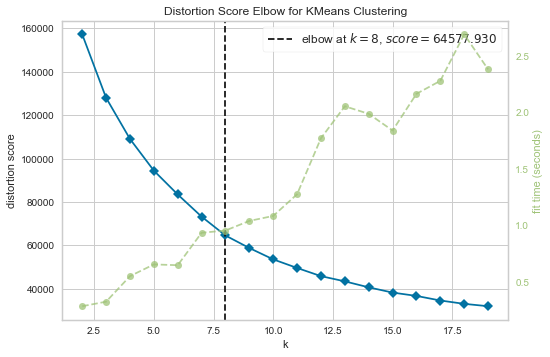

In [377]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,20))
visualizer.fit(df_seg_scl) 
visualizer.poof()  

In [378]:
# Method shows us 8 cluster is effective but we dont need to take this number absolute must.
# 5 seems also sensible

In [379]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)
kmeans

KMeans(n_clusters=5)

In [380]:
k_fit = kmeans.fit(df_seg_scl)

In [381]:
k_fit.n_clusters

5

In [382]:
k_fit.cluster_centers_

array([[-0.10888715,  0.23574313, -1.22672456, -0.28880276, -0.59539064],
       [-0.03308893,  0.89877216, -0.50800017,  2.94032525, -0.28568959],
       [-0.14469375, -0.15093209,  0.81517892, -0.41047917, -0.58278353],
       [ 4.82601963,  0.23277408, -0.16691307,  0.17766307,  0.40082294],
       [-0.05585173, -0.14532304, -0.14330149,  0.38980932,  1.52476758]])

In [383]:
k_fit.labels_

array([4, 2, 2, ..., 0, 4, 2])

In [384]:
# Since our study data is 5-dimensional, we cannot provide a clear visualization, 
# but we can consider our existing labels as new segments

In [385]:
df_seg["cluster"] = k_fit.labels_

In [386]:
df_seg.head()

,balance,age,housing,job_new,education_new,cluster
0,2143,58,1,0.082782,0.091826,4
1,29,44,1,0.072534,0.067546,2
2,2,33,1,0.062633,0.067546,2
3,1506,47,1,0.057018,0.062704,2
4,1,33,0,0.072340,0.062704,0


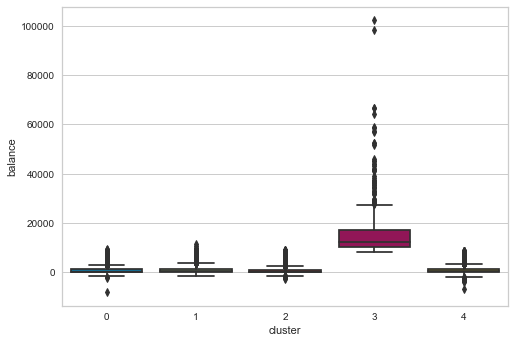

In [387]:
sns.boxplot( x=df_seg.cluster, y=df_seg.balance );

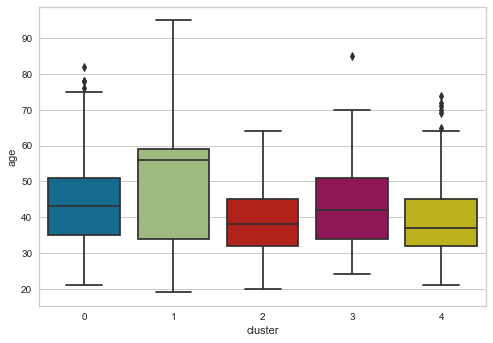

In [388]:
sns.boxplot( x=df_seg.cluster, y=df_seg.age );